<a href="https://colab.research.google.com/github/Nkosana-263/Zindi-Challenges/blob/main/Runmila%20AI%20Challenge/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 https://drive.google.com/file/d/1KdpV3M27kV-_QOQOrAentfzZ2tew8YS-/view?usp=sharing - gdrive link

In [ ]:
from google.colab import drive
 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
 
os.mkdir('images')

In [ ]:
import zipfile
 
local_zip = '/content/gdrive/MyDrive/data/tbdata/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('images')

In [ ]:
import zipfile
 
local_zip = '/content/gdrive/MyDrive/data/tbdata/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('images')

In [ ]:
import pandas as pd
 
train = pd.read_csv('/content/gdrive/MyDrive/data/tbdata/Train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  718 non-null    object
 1   ID        718 non-null    object
 2   LABEL     718 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.0+ KB


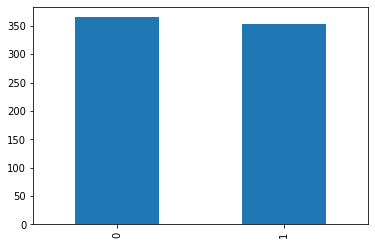

In [ ]:
train['LABEL'].value_counts().plot(kind='bar')

In [ ]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 13.3MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
!pip install nbdev

     |████████████████████████████████| 51kB 6.0MB/s 


In [ ]:
from fastai.vision.all import *

In [ ]:
doc(aug_transforms)

In [ ]:
#import numpy as np

#seed = np.random.seed(442
dls = ImageDataLoaders.from_df(train,path='images/', valid_pct=0.15, seed=42, label_col='LABEL',item_tfms=Resize(224), bs=64)

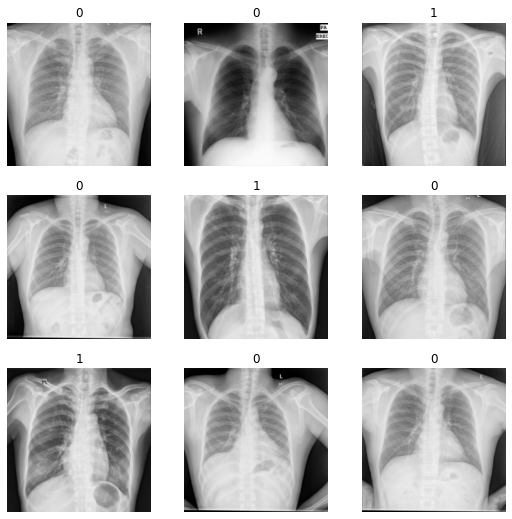

In [ ]:
dls.show_batch()

In [ ]:
from torchvision import models

In [ ]:
doc(cnn_learner)

In [ ]:
learn = cnn_learner(dls, models.vgg19_bn, metrics=accuracy, model_dir='/content/models')

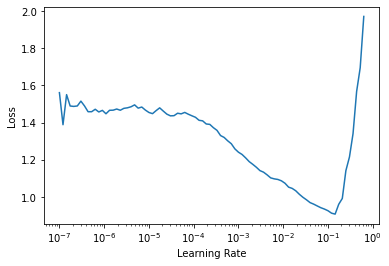

In [ ]:
lr_min, lr_steep = learn.lr_find()

In [ ]:
lr_min

0.014454397559165954

In [ ]:
doc(SaveModelCallback)

In [ ]:
#callbacks = [SaveModelCallback(monitor='accuracy'), ReduceLROnPlateau(monitor='accuracy',min_delta=0.1, patience=2)]
 
learn.fine_tune(15, lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,0.962500,1.815227,0.485981,01:24


epoch,train_loss,valid_loss,accuracy,time
0,0.708782,0.795387,0.719626,01:23
1,0.520802,0.499379,0.813084,01:23
2,0.393989,1.050336,0.813084,01:23
3,0.342021,0.757149,0.803738,01:23
4,0.323477,0.724018,0.822430,01:23
5,0.265607,0.822962,0.813084,01:24
6,0.228278,1.091526,0.850467,01:24
7,0.205386,1.566630,0.719626,01:23
8,0.198707,0.804314,0.803738,01:23
9,0.170411,0.719707,0.794393,01:23


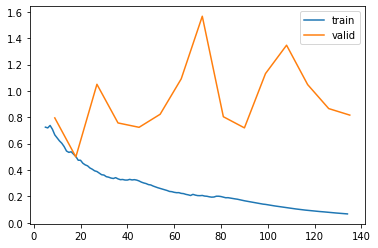

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

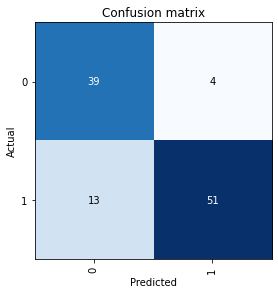

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        43
           1       0.93      0.80      0.86        64

    accuracy                           0.84       107
   macro avg       0.84      0.85      0.84       107
weighted avg       0.86      0.84      0.84       107



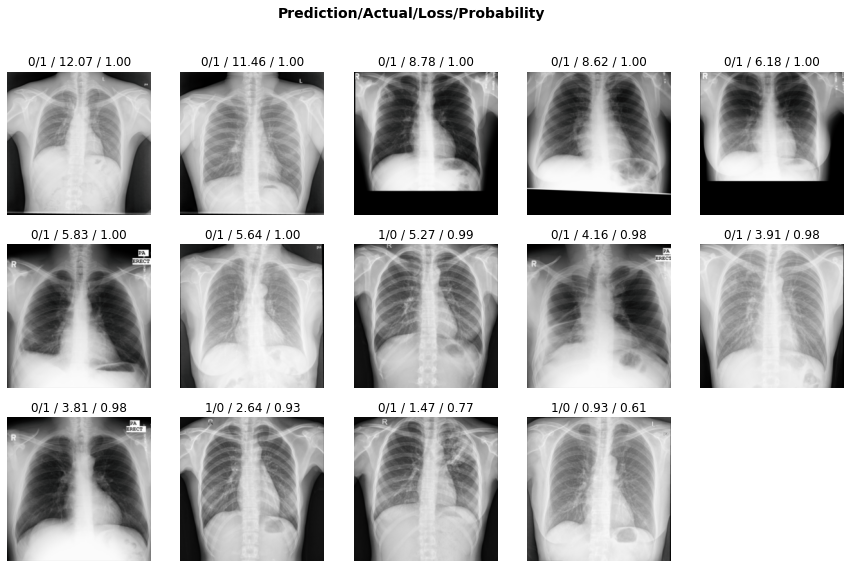

In [ ]:
interp.plot_top_losses(14)

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/data/tbdata/Test.csv')
test.head()

,filename,ID
0,test/GTWSHFYQ.png,GTWSHFYQ
1,test/QTFSSMGD.png,QTFSSMGD
2,test/TBLBHSYT.png,TBLBHSYT
3,test/ZKETEOFG.png,ZKETEOFG
4,test/GKTPBGZP.png,GKTPBGZP


In [ ]:
tdl = learn.dls.test_dl(test)
 
probs, class_ = learn.get_preds(dl=tdl)

In [ ]:
train.LABEL.unique()

array([1, 0])

In [ ]:
test['LABEL'] = [x.item() for x in probs[:,1]]

In [ ]:
test.drop(columns='filename').to_csv('Submission5.csv', index=False)

In [ ]:
from sklearn.metrics import roc_auc_score
def auc_score(y_score,y_true):
    return torch.tensor(roc_auc_score(y_true,y_score[:,1]))
probs,val_labels = learn.get_preds(dl=dls.valid) 
print('Accuracy',accuracy(probs,val_labels)),
print('Error Rate', error_rate(probs, val_labels))
print('AUC', auc_score(probs,val_labels))

Accuracy TensorImage(0.8411)
Error Rate TensorImage(0.1589)
AUC tensor(0.9259, dtype=torch.float64)


In [ ]:
#import pandas as pd
 
#sub1 = pd.read_csv('Submission3.csv')
#sub2 = pd.read_csv('vgg19_bn.csv')

In [ ]:
#sub3 = pd.merge(sub1,sub2,on='yID')

In [ ]:
#sub3['LABEL'] = (sub3['LABEL_x'] + sub3['LABEL_y'])/2

In [ ]:
#sub3[['ID','LABEL']].to_csv('ensemble.csv',index=False)